### Import basic modules

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [24]:
# df = pd.read_csv('data/Dataset.csv')

### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [25]:
# import modules.cleansing as cl

# df = cl.remove_columns(df, ['PATIENT_TYPE'])
# df = cl.remove_invalid_values(df)
# df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
# df_original = df.copy()
# df = cl.remove_outliers(df, 'AGE')
# df = cl.impute_missing_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE'])

In [26]:
# df.to_csv('data/Dataset_revised_new.csv', index=False)
# df_original.to_csv('data/Dataset_revised_org.csv', index=False)
# df.describe()

### II/ Descriptive Statistics and Data Visualisation: 
 


In [27]:
df_original = pd.read_csv('data/Dataset_revised_org.csv')
df = pd.read_csv('data/Dataset_revised_new.csv')

/tmp/ipykernel_896665/2795104614.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('data/Dataset_revised_org.csv')


In [28]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df_main = df[new_column_list].copy()
analytics_df_main

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194338,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
194339,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
194340,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
194341,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


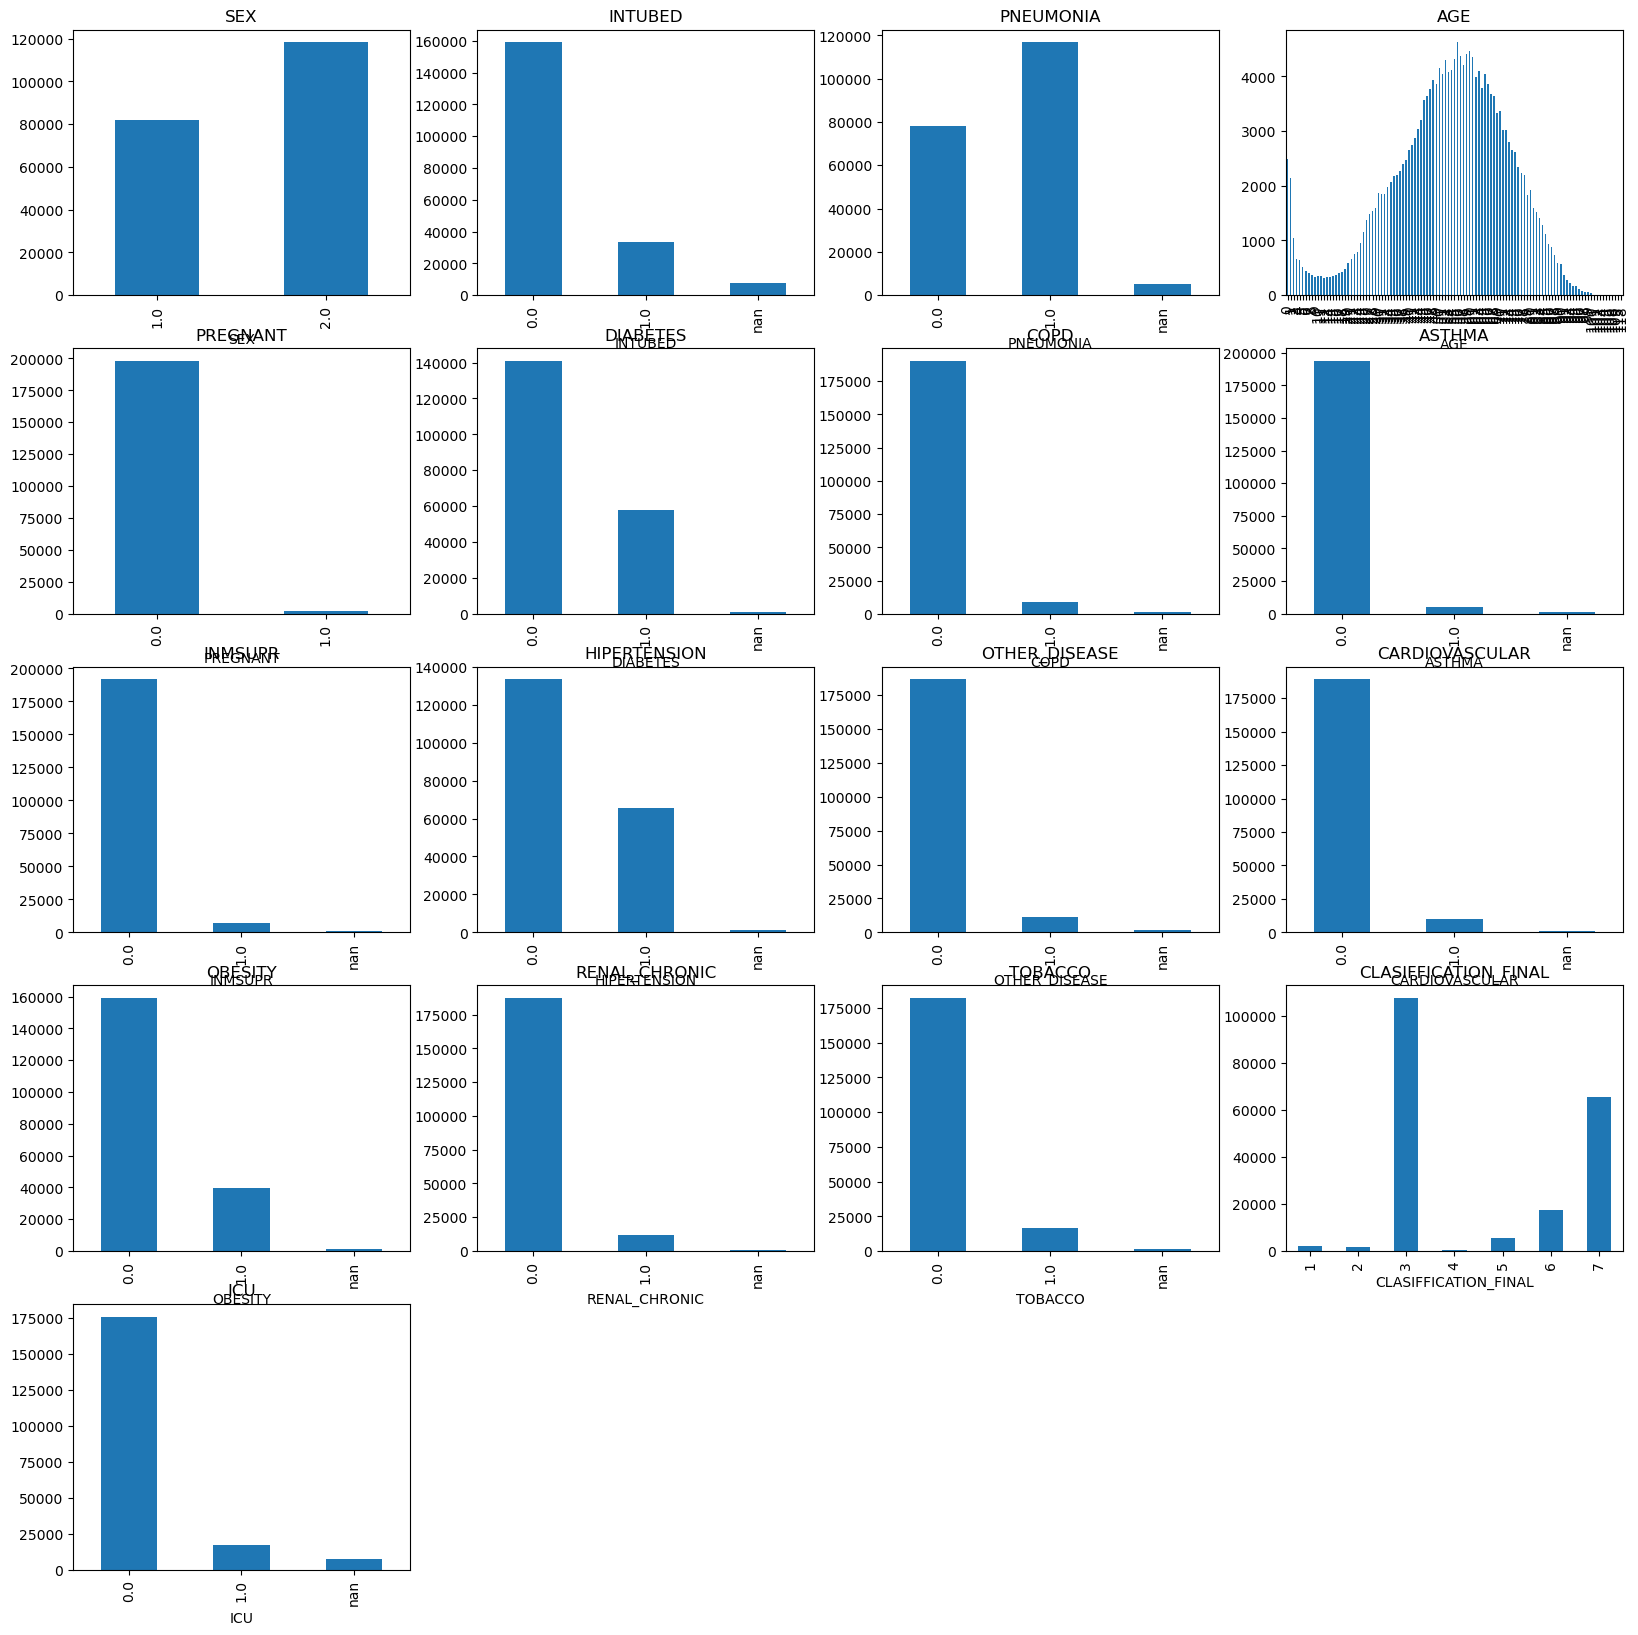

In [29]:
import modules.analytics_helper as ah

org_analytics_df = df_original[new_column_list].copy()
# analytics_df
# print(org_analytics_df['PNEUMONIA'])

ah.plot_multiple_metrics(df=org_analytics_df, columns=new_column_list, figsize=(20, 20))

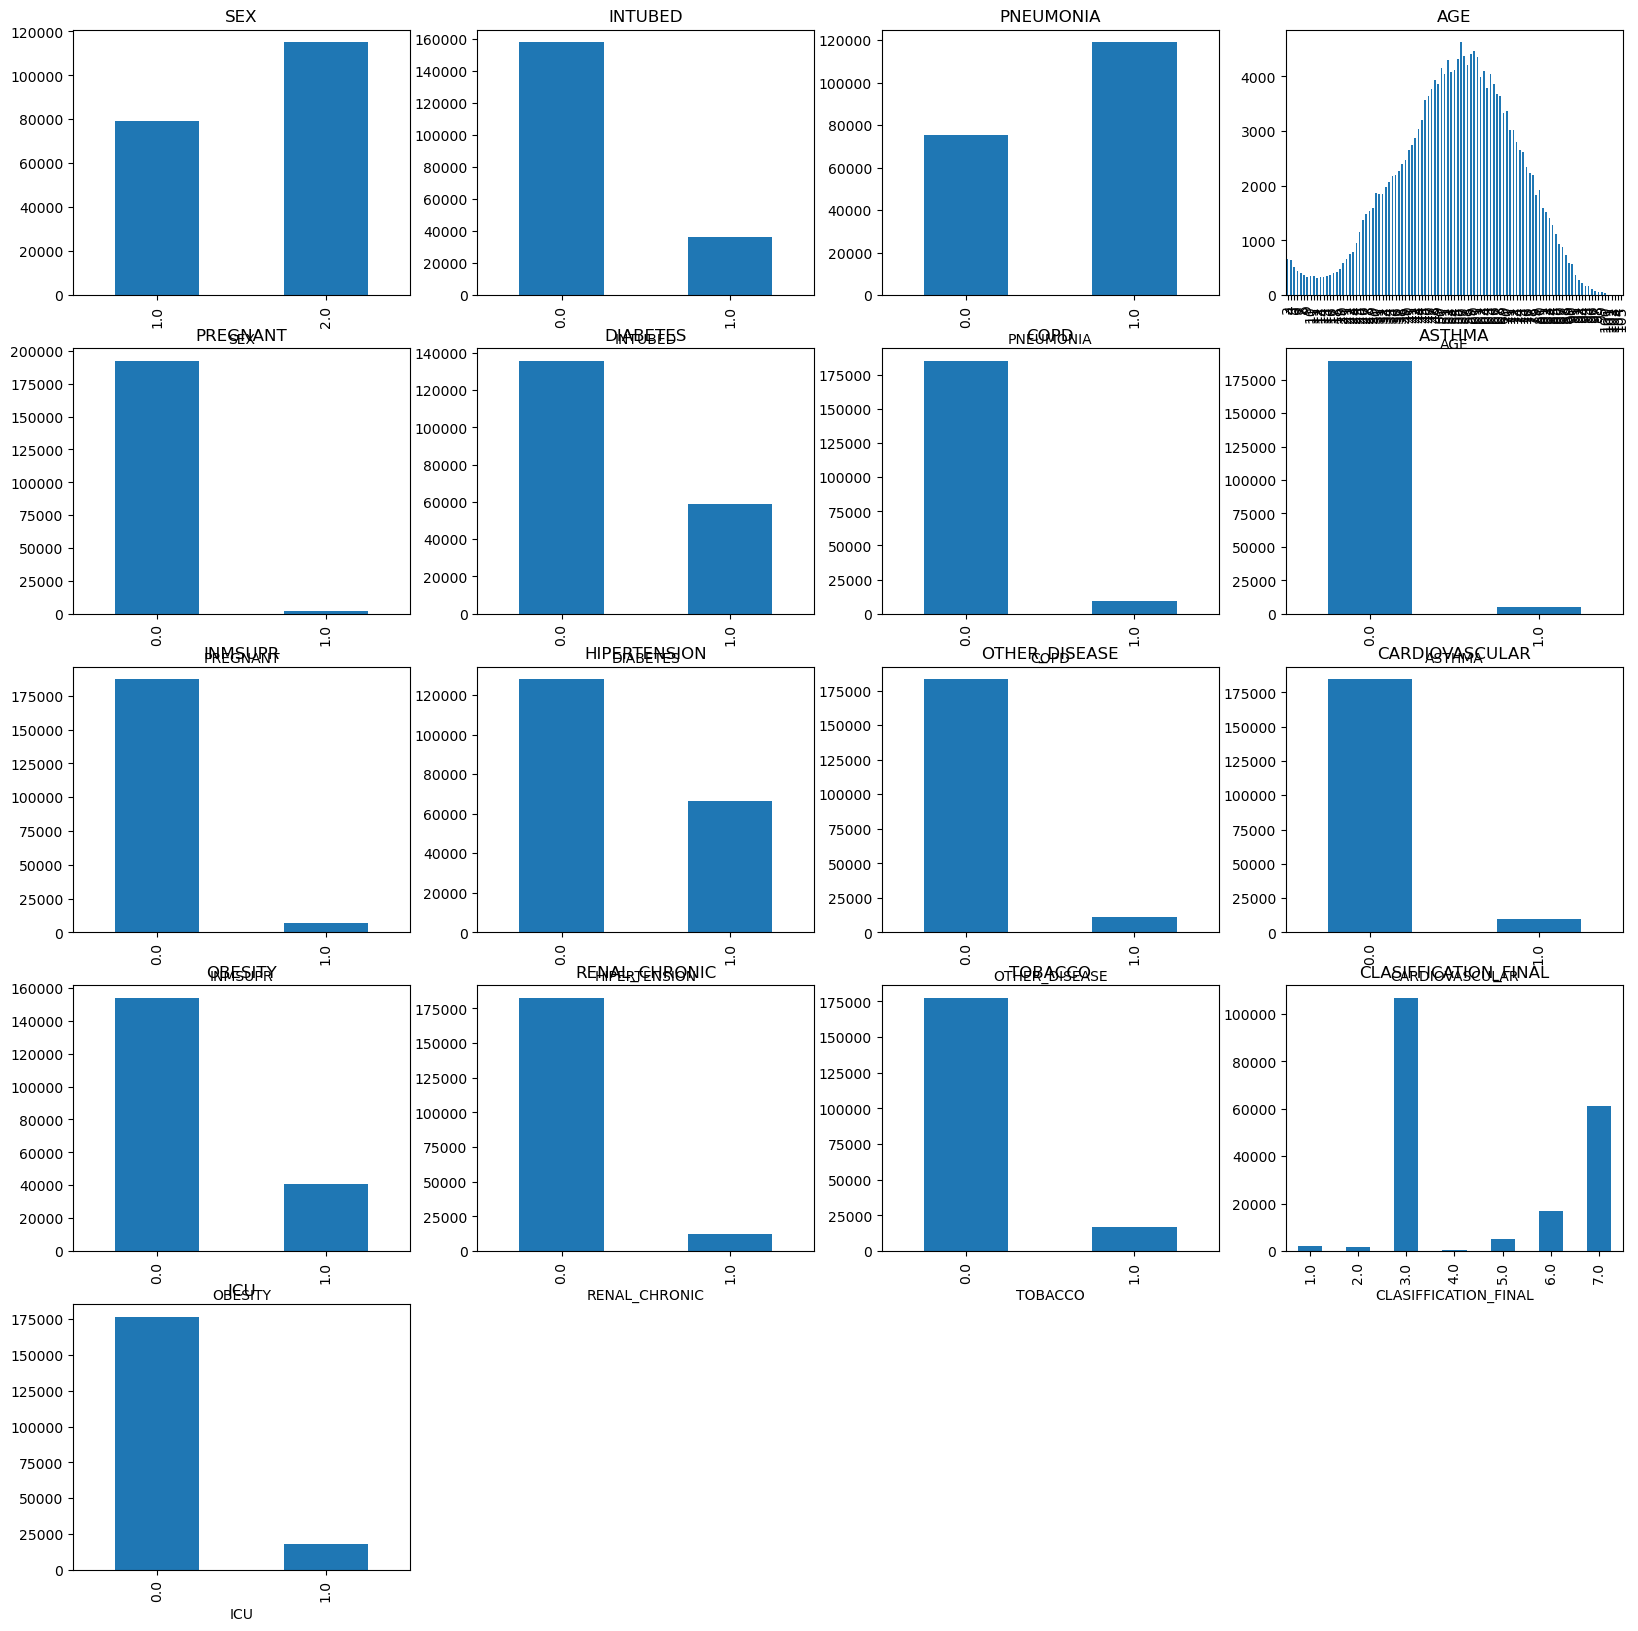

In [30]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df_main, columns=new_column_list, figsize=(20, 20))

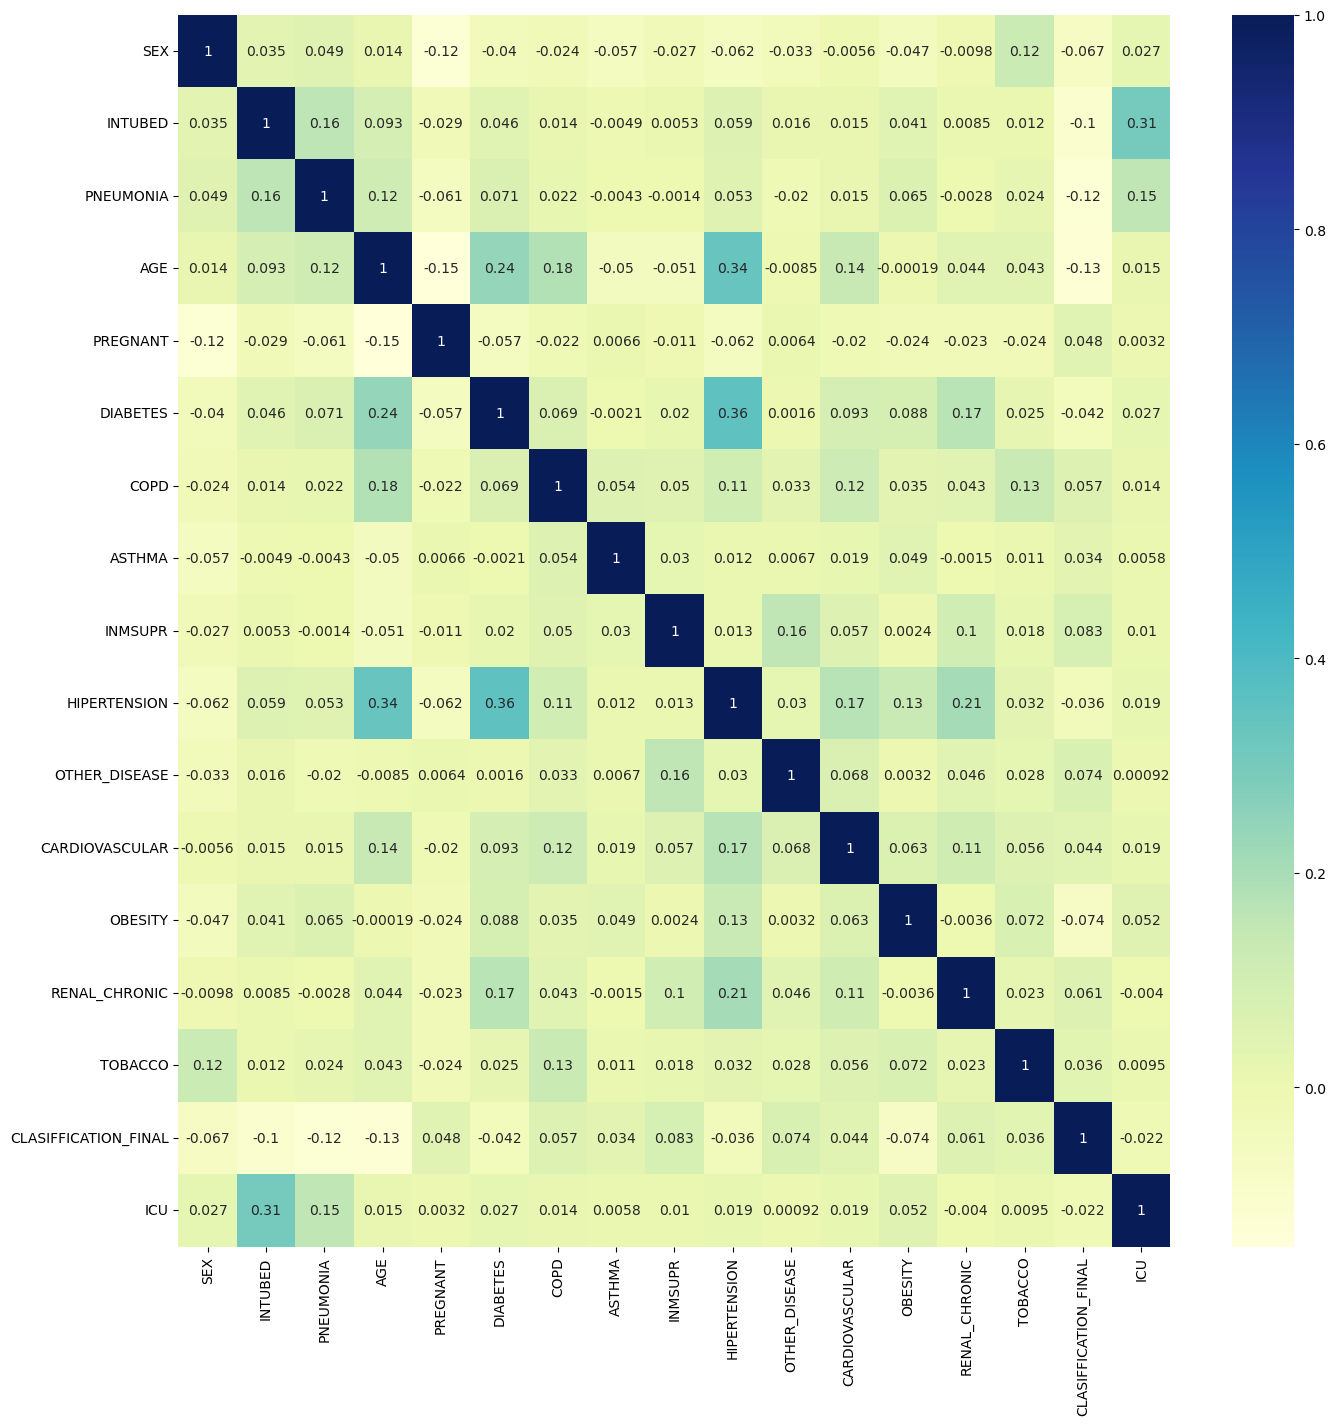

In [31]:
plt.figure(figsize=(16, 16))
co_mtx = analytics_df_main.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

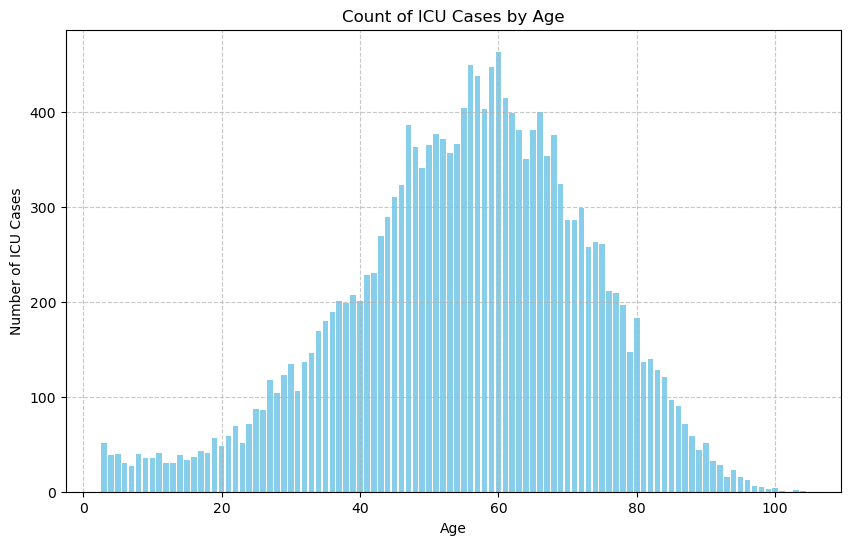

In [32]:
icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### III/ Model

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import modules.modeling as md
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Discretize features into bins (e.g., 5 bins)
y = analytics_df_main['ICU']
X = analytics_df_main.drop(['ICU', 'CLASIFFICATION_FINAL'], axis=1)

analytics_df_main = analytics_df_main.drop(['CLASIFFICATION_FINAL'], axis=1)
# analytics_df['AGE'] = pd.cut(analytics_df['AGE'], bins=10, labels=False)


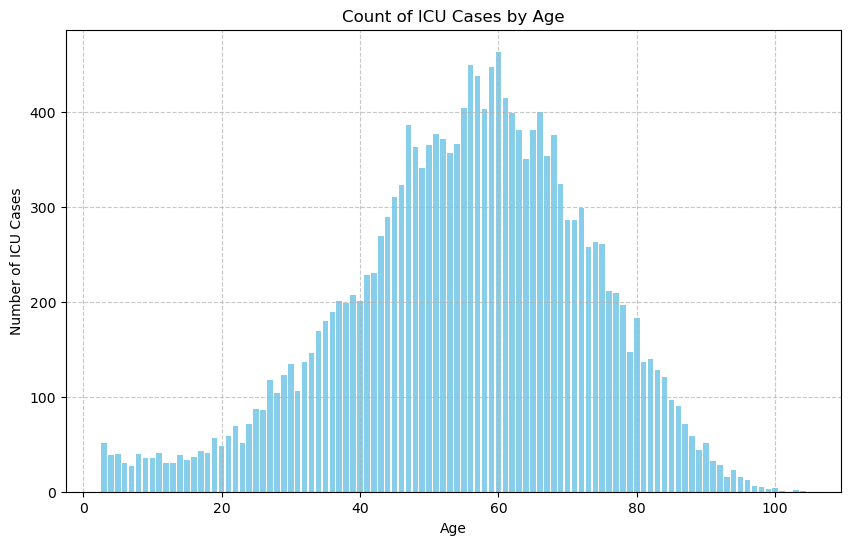

In [ ]:
analytics_df = md.cleanDataForModeling(analytics_df_main)

icu_by_age = analytics_df[analytics_df['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from collections import Counter

analytics_df = md.cleanDataForModeling(analytics_df_main)
occurence = []
count = 0
occurence = occurence + md.feature_selection_coefficient(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_mutual_info(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_anova(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_chi2(df=analytics_df, target_column='ICU', continuous_columns=[], select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_rfe(df=analytics_df, target_column='ICU', select_k_best=11)
count = count + 1
print('-' * 100)
select_feature_probability = dict(Counter(occurence))
select_feature_probability = {k:float(v/count) for k, v in select_feature_probability.items()}
print(select_feature_probability)

Correlations with target:
INTUBED           0.307864
PNEUMONIA         0.153503
OBESITY           0.051905
SEX               0.027343
DIABETES          0.026657
CARDIOVASCULAR    0.019496
HIPERTENSION      0.018897
AGE               0.015480
COPD              0.013944
INMSUPR           0.010276
TOBACCO           0.009495
ASTHMA            0.005786
PREGNANT          0.003193
OTHER_DISEASE     0.000925
RENAL_CHRONIC    -0.003966
dtype: float64
Top 6 features: ['INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES', 'CARDIOVASCULAR']
----------------------------------------------------------------------------------------------------
Mutual Information Scores:
PNEUMONIA         0.043648
INTUBED           0.038936
SEX               0.030800
HIPERTENSION      0.013311
DIABETES          0.009478
OBESITY           0.005390
RENAL_CHRONIC     0.001185
OTHER_DISEASE     0.000986
TOBACCO           0.000868
ASTHMA            0.000830
AGE               0.000671
CARDIOVASCULAR    0.000547
PREGNANT     

### Logistic Regression Model

#### 1. 5 chosen features: 'SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY'

X_train shape: (136040, 5)
X_test shape: (58303, 5)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying SMOTE: (247484, 5)
y_train shape after applying SMOTE: (247484,)
--------------------------------------------------
X_train shape: (136040, 5)
X_test shape: (58303, 5)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying NearMiss (24596, 5)
y_train shape after applying NearMiss: (24596,)


<Axes: title={'center': 'ICU'}, xlabel='ICU'>

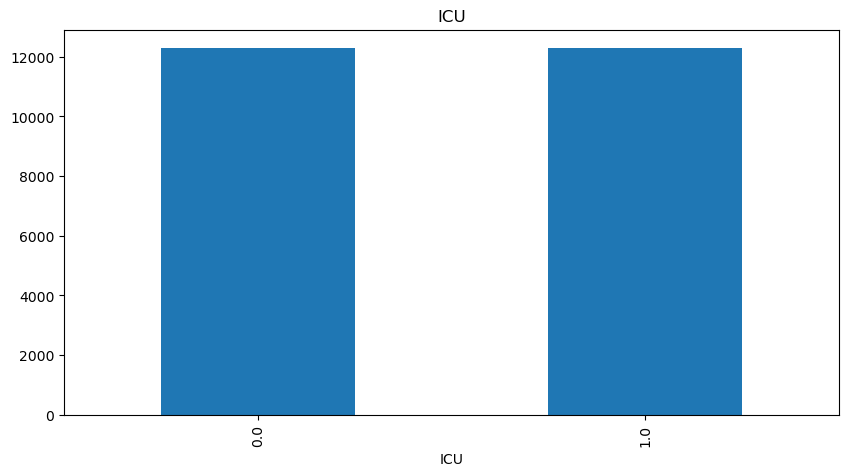

In [36]:
analytics_df = analytics_df_main[['SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY','ICU']]

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)
y = analytics_df['ICU']
X = analytics_df.drop(['ICU'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                        , test_size=0.3
                                                        , random_state=42
                                                        , stratify=y)

X_over_train, X_over_test, y_over_train, y_over_test = md.generate_train_test_over_set(df=analytics_df, target_column='ICU', test_size=0.3)
print('-' * 50)
X_under_train, X_under_test, y_under_train, y_under_test = md.generate_train_test_under_set(df=analytics_df, target_column='ICU', test_size=0.3)
y_under_train.value_counts(dropna=False).sort_index().plot(kind='bar', title='ICU', figsize=(10, 5))

##### Apply Random Forest model to original dataset

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     53033
         1.0       0.43      0.03      0.05      5270

    accuracy                           0.91     58303
   macro avg       0.67      0.51      0.50     58303
weighted avg       0.87      0.91      0.87     58303

Training accuracy: 0.9106
Test accuracy: 0.9088
Accuracy: 0.91

Feature Importance:
Feature 1: 0.0117
Feature 2: 0.6321
Feature 3: 0.1406
Feature 4: 0.1973
Feature 5: 0.0183


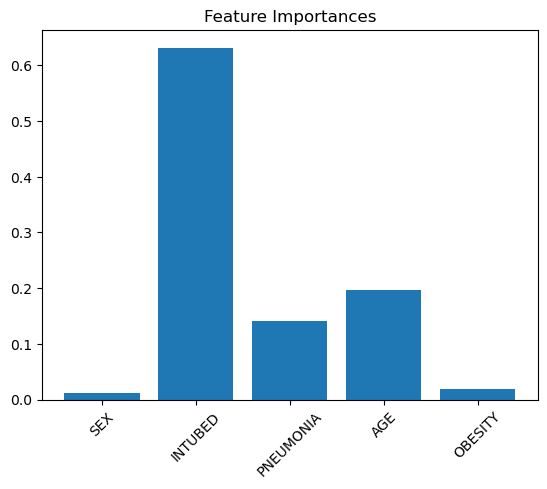

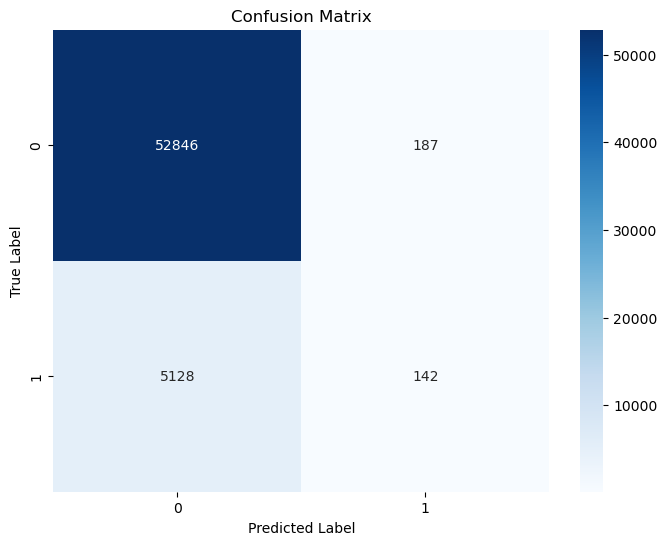

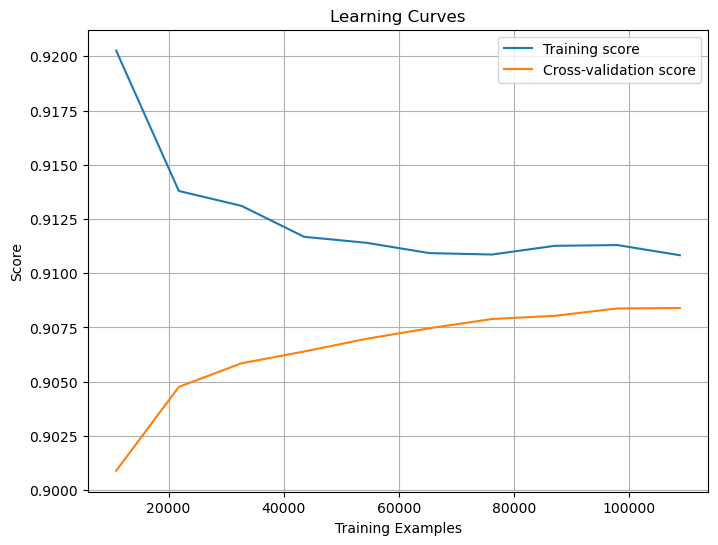

In [37]:
md.random_forest_model(training_set={'X': X_train, 'Y': y_train} , test_set={'X': X_test, 'Y': y_test}, n_estimators=50, min_samples_split=2)

##### Apply Random Forest model to oversampling dataset

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89     53033
         1.0       0.25      0.57      0.35      5270

    accuracy                           0.81     58303
   macro avg       0.60      0.70      0.62     58303
weighted avg       0.89      0.81      0.84     58303

Training accuracy: 0.7425
Test accuracy: 0.8087
Accuracy: 0.81

Feature Importance:
Feature 1: 0.0046
Feature 2: 0.5429
Feature 3: 0.1768
Feature 4: 0.2602
Feature 5: 0.0153


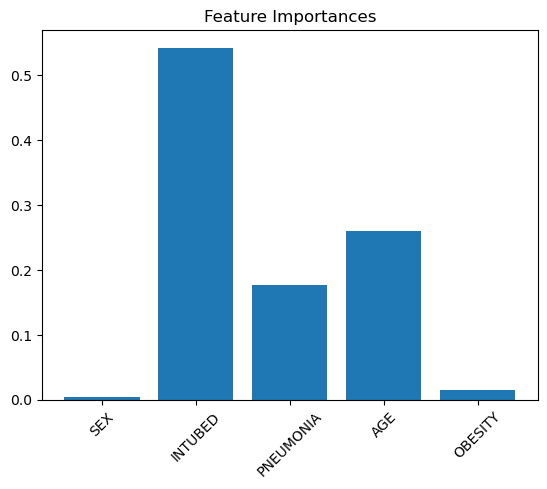

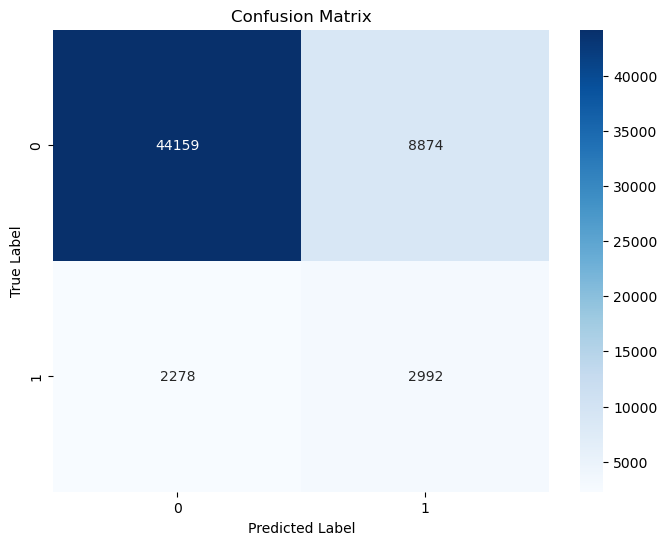

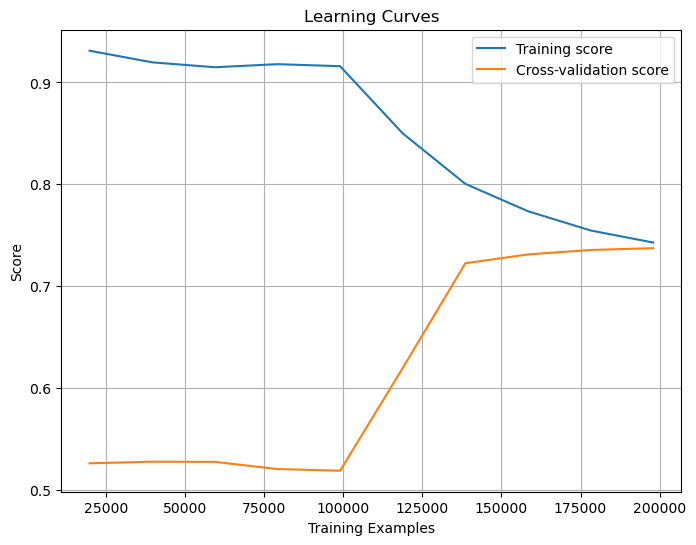

In [38]:
md.random_forest_model(training_set={'X': X_over_train, 'Y': y_over_train}
                       , test_set={'X': X_test, 'Y': y_test}
                       , n_estimators=50
                       , min_samples_split=2)

##### Apply Random Forest model to undersampling dataset

Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     53033
         1.0       0.18      0.63      0.28      5270

    accuracy                           0.71     58303
   macro avg       0.56      0.67      0.55     58303
weighted avg       0.88      0.71      0.77     58303

Training accuracy: 0.7272
Test accuracy: 0.7053
Accuracy: 0.71

Feature Importance:
Feature 1: 0.0089
Feature 2: 0.5876
Feature 3: 0.1181
Feature 4: 0.2410
Feature 5: 0.0443


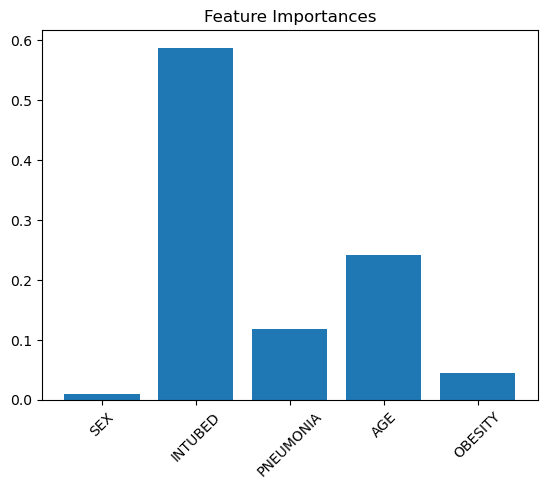

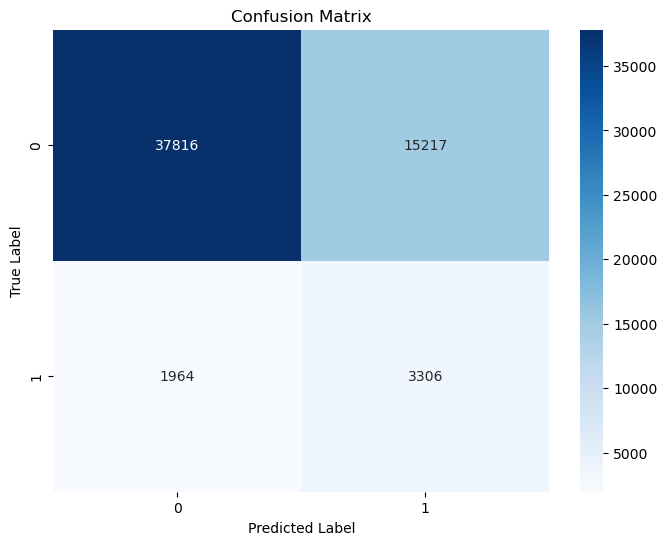

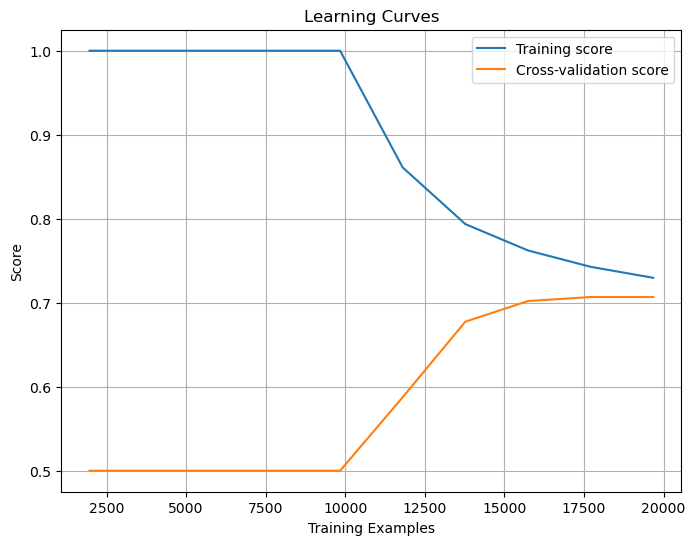

In [39]:
md.random_forest_model(training_set={'X': X_under_train, 'Y': y_under_train}
                       , test_set={'X': X_under_test, 'Y': y_under_test}
                       , n_estimators=50
                       , min_samples_split=2)

#### 2. 5 chosen features: 'SEX', 'PNEUMONIA', 'AGE', 'PREGNANT', 'OBESITY'

In [50]:
# 5 chosen features: 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX', 'CARDIOVASCULAR'
analytics_df = analytics_df_main[['SEX', 'PNEUMONIA', 'AGE', 'PREGNANT', 'OBESITY', 'ICU']]

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)
y = analytics_df['ICU']
X = analytics_df.drop(['ICU'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                        , test_size=0.3
                                                        , random_state=42
                                                        , stratify=y)

X_over_train, X_over_test, y_over_train, y_over_test = md.generate_train_test_over_set(df=analytics_df, target_column='ICU', test_size=0.3)
print('-' * 50)
X_under_train, X_under_test, y_under_train, y_under_test = md.generate_train_test_under_set(df=analytics_df, target_column='ICU', test_size=0.3)

X_train shape: (136040, 5)
X_test shape: (58303, 5)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying SMOTE: (247484, 5)
y_train shape after applying SMOTE: (247484,)
--------------------------------------------------
X_train shape: (136040, 5)
X_test shape: (58303, 5)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying NearMiss (24596, 5)
y_train shape after applying NearMiss: (24596,)


##### Apply Random Forest model to original dataset

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     53033
         1.0       0.15      0.00      0.00      5270

    accuracy                           0.91     58303
   macro avg       0.53      0.50      0.48     58303
weighted avg       0.84      0.91      0.87     58303

Training accuracy: 0.9097
Test accuracy: 0.9095
Accuracy: 0.91

Feature Importance:
Feature 1: 0.0223
Feature 2: 0.5747
Feature 3: 0.3184
Feature 4: 0.0104
Feature 5: 0.0741


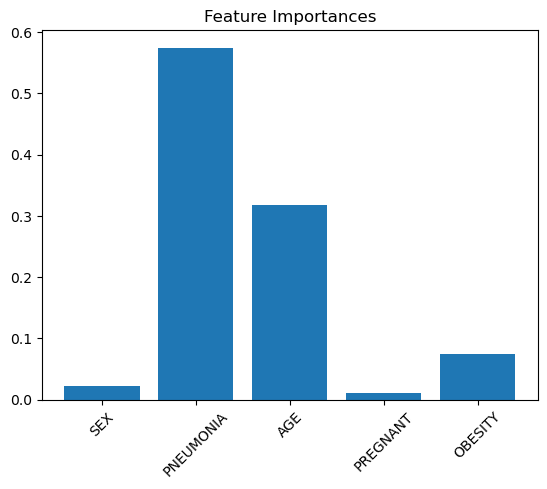

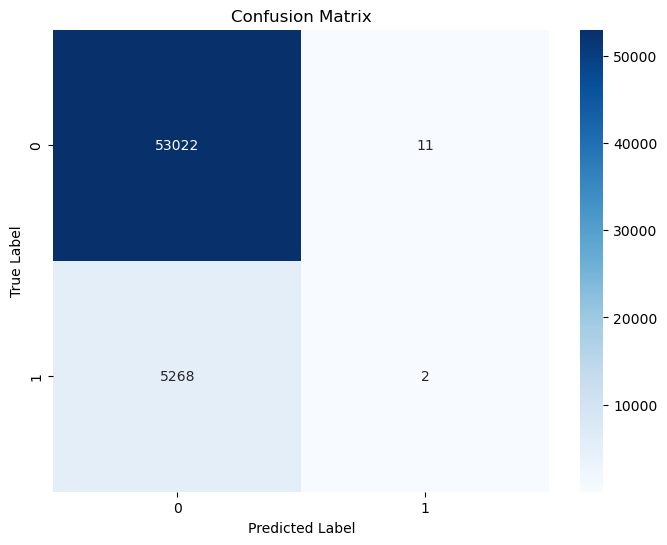

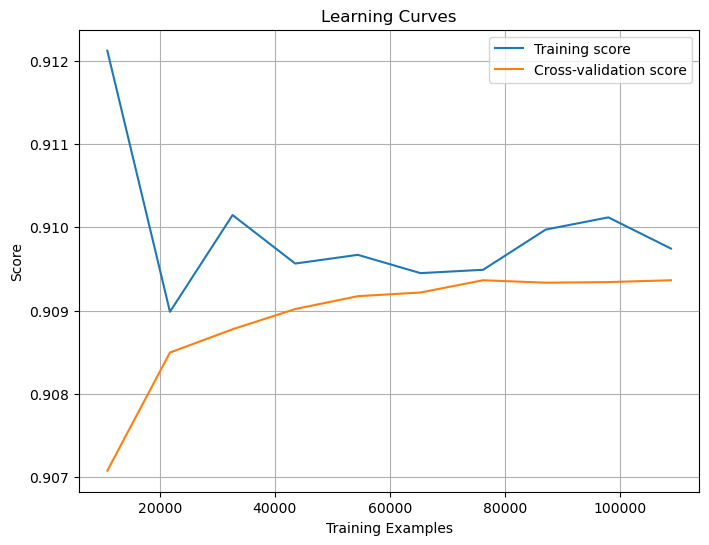

In [51]:
md.random_forest_model(training_set={'X': X_train, 'Y': y_train} 
                       , test_set={'X': X_test, 'Y': y_test}
                       , n_estimators=50
                       , min_samples_split=2)

##### Apply Random Forest model to oversampling dataset

Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.48      0.64     53033
         1.0       0.13      0.76      0.22      5270

    accuracy                           0.51     58303
   macro avg       0.54      0.62      0.43     58303
weighted avg       0.88      0.51      0.60     58303

Training accuracy: 0.6479
Test accuracy: 0.5077
Accuracy: 0.51

Feature Importance:
Feature 1: 0.0167
Feature 2: 0.5702
Feature 3: 0.3620
Feature 4: 0.0050
Feature 5: 0.0460


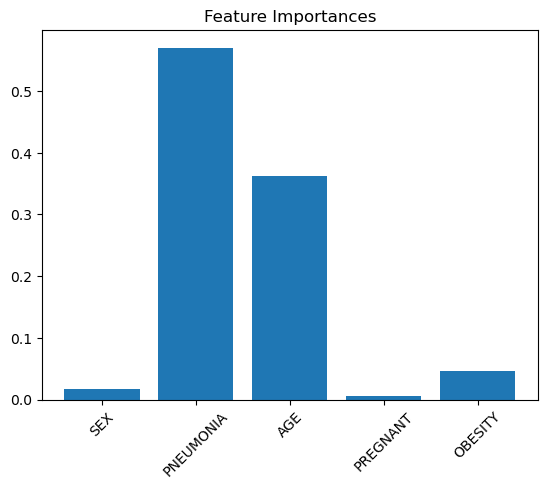

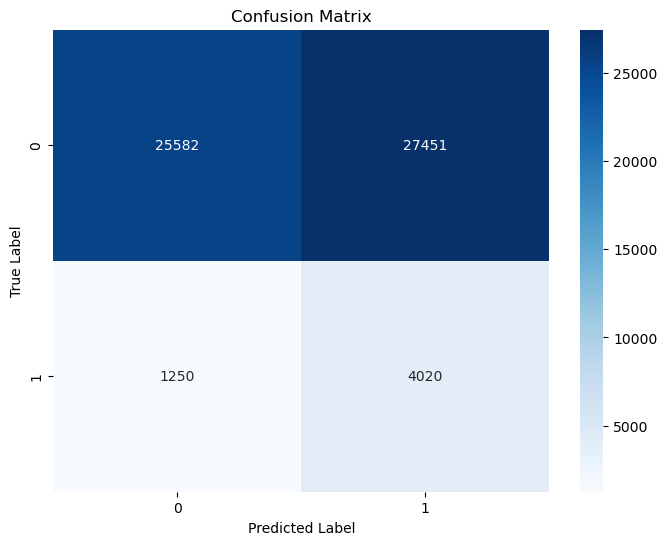

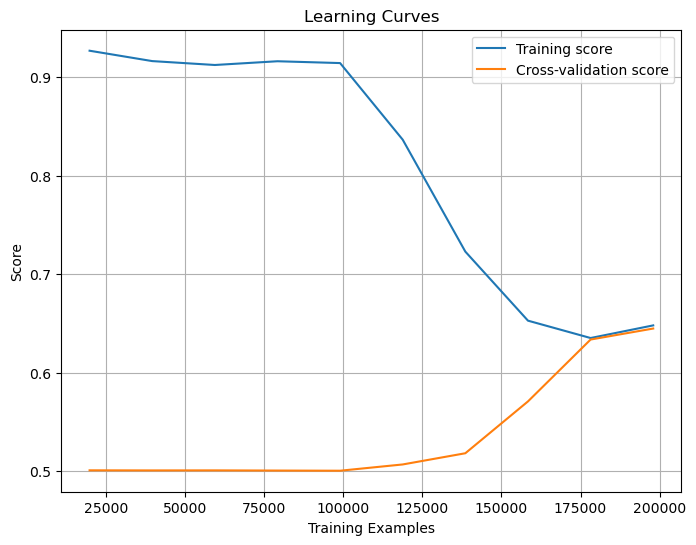

In [ ]:
md.random_forest_model(training_set={'X': X_over_train, 'Y': y_over_train} 
                       , test_set={'X': X_over_test, 'Y': y_over_test}
                       , n_estimators=100
                       , min_samples_split=2)

##### Apply Random Forest model to undersampling dataset

Accuracy: 0.48
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.45      0.61     53033
         1.0       0.12      0.75      0.21      5270

    accuracy                           0.48     58303
   macro avg       0.53      0.60      0.41     58303
weighted avg       0.87      0.48      0.58     58303

Training accuracy: 0.6338
Test accuracy: 0.4807
Accuracy: 0.48

Feature Importance:
Feature 1: 0.0182
Feature 2: 0.5033
Feature 3: 0.3785
Feature 4: 0.0277
Feature 5: 0.0722


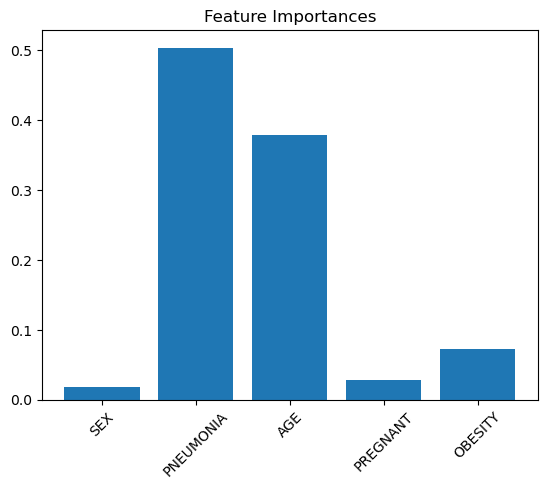

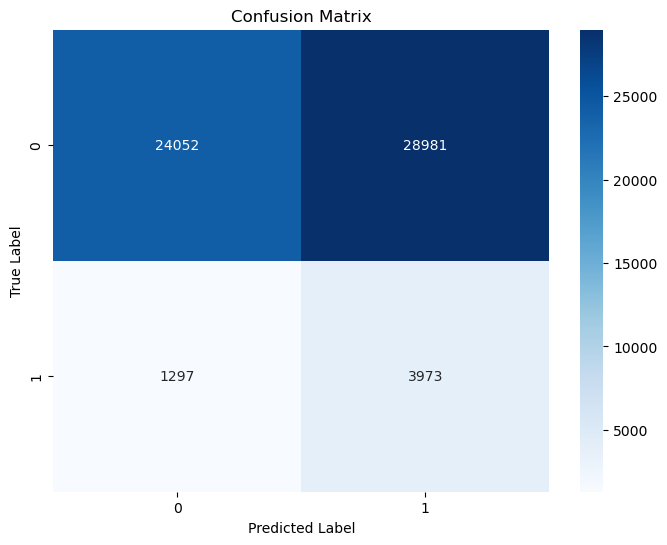

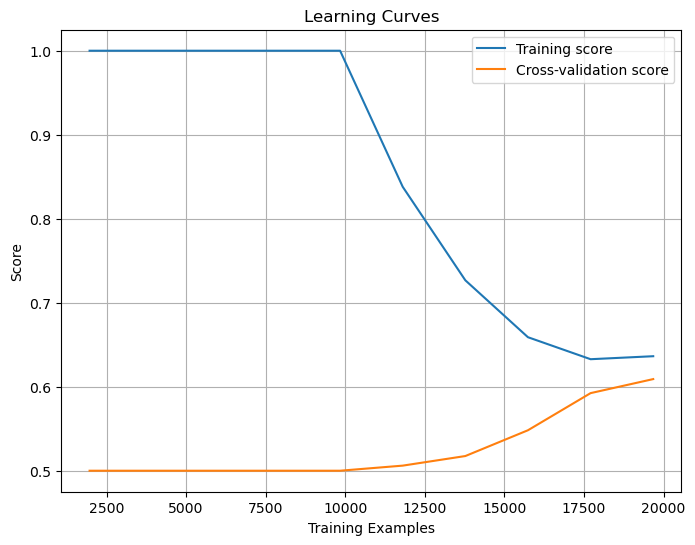

In [53]:
md.random_forest_model(training_set={'X': X_under_train, 'Y': y_under_train} 
                       , test_set={'X': X_under_test, 'Y': y_under_test}
                       , n_estimators=50
                       , min_samples_split=2)